In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

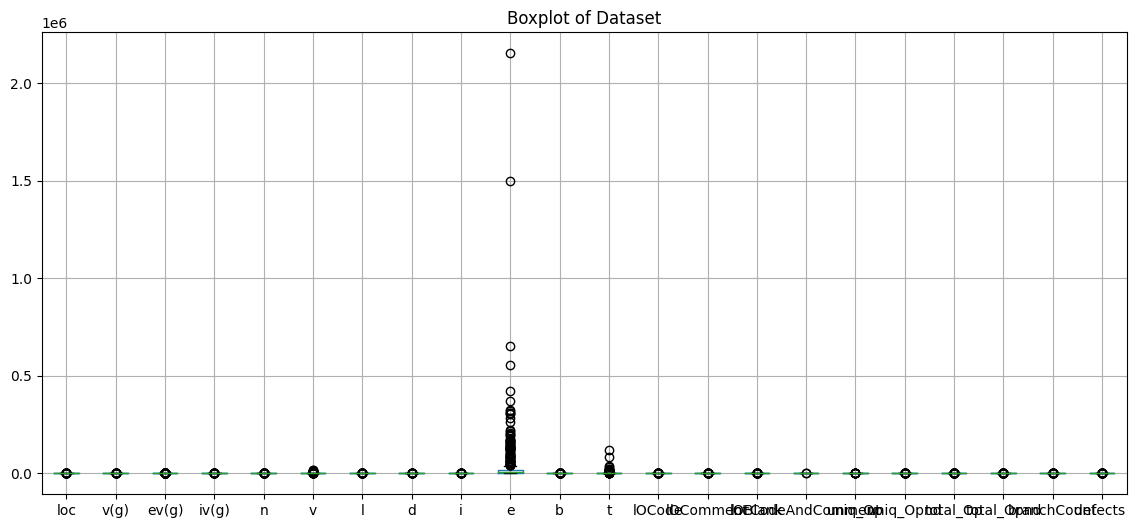

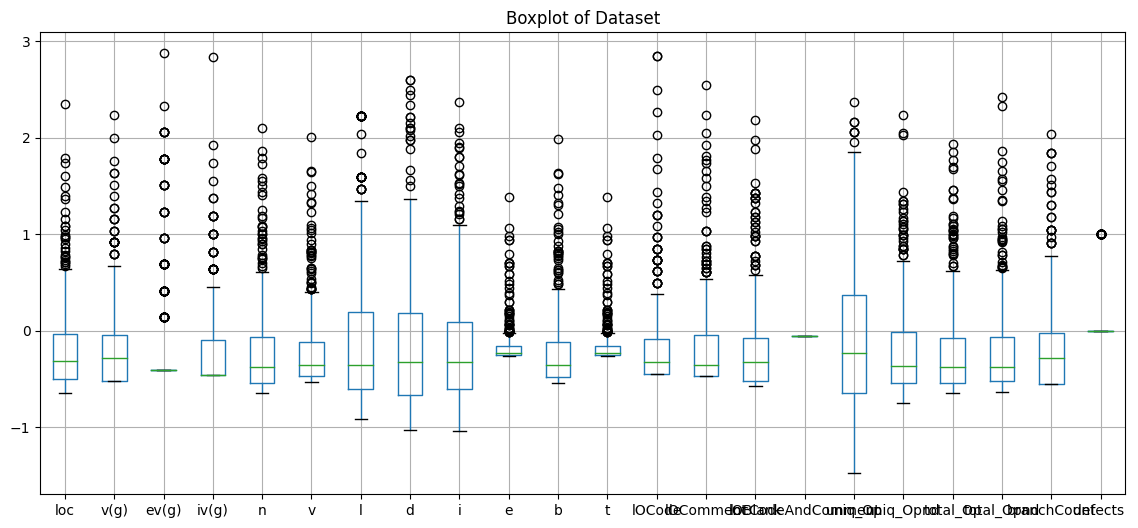

In [ ]:
# Step 2: Load the dataset
data = pd.read_csv("CM1.csv")

data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

plt.figure(figsize=(14, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()

exclude_column = 'defects '  # Specify the column to exclude
columns_to_process = [col for col in data.columns if col != exclude_column]




scaler = StandardScaler()
data[columns_to_process] = scaler.fit_transform(data[columns_to_process])



z_scores = np.abs((data[columns_to_process] - data[columns_to_process].mean()) / data[columns_to_process].std())
threshold = 3  # Set the threshold for outlier detection
data = data[(z_scores < threshold).all(axis=1)]

plt.figure(figsize=(14, 6))
data.boxplot()
plt.title('Boxplot of Dataset')
plt.show()


In [ ]:
X = data.drop('defects ', axis=1)
y = data['defects '].astype(int)
y
print(y.value_counts())

0    408
1     38
Name: defects , dtype: int64


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Perform feature selection using SelectKBest
k = 1  # Set the desired number of top features
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
selected_features_list = selected_features.tolist()  # Convert to list
print("Selected Features:", selected_features_list)

Selected Features: ['lOComment']


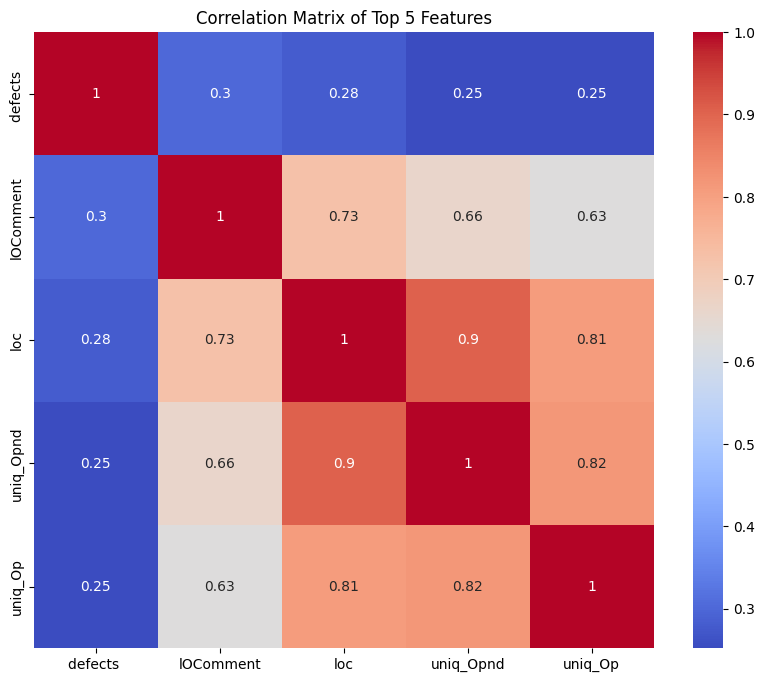

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

num_features = 5
top_features = correlation_matrix.abs().nlargest(num_features, 'defects ').index
top_feature_matrix = data[top_features]

# Calculate the correlation matrix for the top features
top_feature_corr = top_feature_matrix.corr()

# Create the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(top_feature_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Top 5 Features")
plt.show()


In [ ]:
print("Selected Features:",top_features[1])

Selected Features: lOComment


# Dataset used for Testing Various SRGM
## The best results obtained for **Yamada Rayleigh** and **P-N-Z Models**

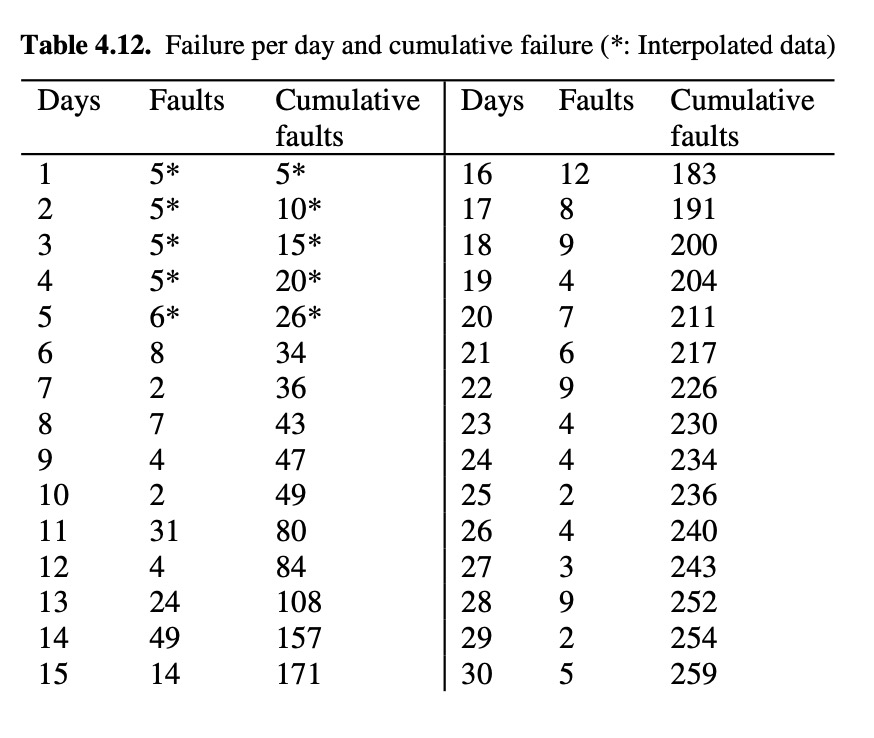

In [34]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Goel-Okumoto model function
def goel_okumoto(t, D, alpha):
    return D * (1 - np.exp(-alpha * t))

# Example historical data of fault counts and corresponding test time
t = np.arange(1, 31)
fault_counts = np.array([ 5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171,183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])

# Fit the model to the data and estimate the best parameters
initial_guess = (1, 1)  # Initial guess for D and alpha

# Set lower and upper bounds for the parameters (optional)
param_bounds = ([0, 0], [np.inf, np.inf])

best_params, _ = curve_fit(goel_okumoto, t, fault_counts, p0=initial_guess, bounds=param_bounds, maxfev=10000)

# Extract the estimated parameters
D_estimate, alpha_estimate = best_params

print("Estimated Parameters:")
print("Initial Fault Count (D):", D_estimate)
print("Shape Parameter (alpha):", alpha_estimate)


Estimated Parameters:
Initial Fault Count (D): 1490783.2315466048
Shape Parameter (alpha): 6.332106498026109e-06


Estimated Parameters (a, r, c, d): [3.44137744e+02 9.70693669e-02]


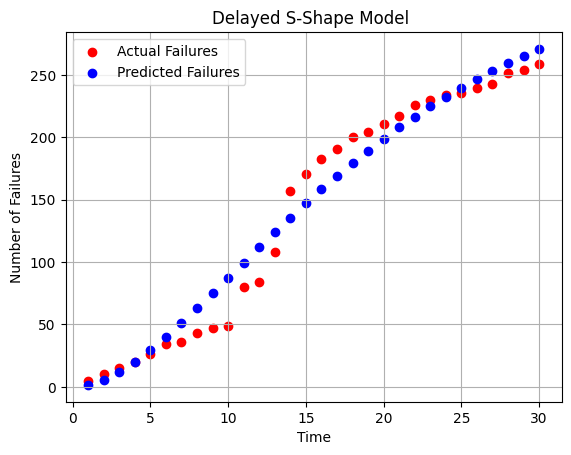

In [4]:
from scipy.optimize import least_squares
from scipy.optimize import minimize

def yr_model(params, time):
    a, b = params
    return a * (1 - (1 + b * time) * np.exp(-b * time))

def nls(params, time, failures):
    #nls
    predicted = yr_model(params, time)
    return predicted - failures

def objective(params, time, failures):
    predicted = yr_model(params, time)
    sse = np.sum((predicted - failures) ** 2)
    return sse

# Load the dataset
time = np.arange(1, 31)
failures = np.array([ 5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171,183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])

# Initial parameter guess
initial_params = [1490783.2315466048,6.332106498026109e-06]
initial_params = [1,1]

# Estimate the parameters using optimization
result = least_squares(nls, initial_params, args=(time, failures))
#minimize(objective, initial_params, args=(time, failures))

# Get the estimated parameters
estimated_params = result.x
print("Estimated Parameters (a, r, c, d):", estimated_params)

# Generate predicted failures based on the estimated parameters
predicted_time = np.linspace(1, 30, 30)  # Time points for prediction
predicted_failures = yr_model(estimated_params, predicted_time)

# Plot the actual failures and predicted failures
plt.scatter(time, failures, c='red', label='Actual Failures')
plt.scatter(predicted_time, predicted_failures, c='blue', label='Predicted Failures')

plt.xlabel('Time')
plt.ylabel('Number of Failures')
plt.title('Delayed S-Shape Model ')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Goel-Okumoto model function
def goel_okumoto(time, a, b, alpha):
    return a * b * (np.exp(alpha * time) - np.exp(-b * time))

# Fit the model to the data and estimate the best parameters
initial_guess = (1, 1,1)  # Initial guess for D and alpha
param_bounds = ([0, 0,0], [np.inf, np.inf, np.inf])

best_params, _ = curve_fit(goel_okumoto, time, failures, p0=initial_guess, bounds=param_bounds, maxfev=10000)

# Extract the estimated parameters
a_est, D_estimate, alpha_estimate = best_params

print("Estimated Parameters:")
print("Initial Fault Count (D):", D_estimate)
print("Shape Parameter (alpha):", alpha_estimate)
print(a_est)

Estimated Parameters:
Initial Fault Count (D): 8.944664046235478e-05
Shape Parameter (alpha): 0.0009002952749656738
105632948.5679452


Estimated Parameters (a, r, c, d): [1.05632949e+08 8.94466405e-05 9.00295275e-04]


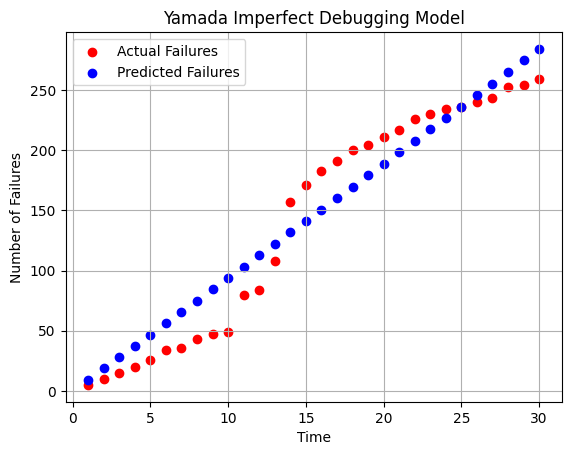

In [50]:
def yr_model(params, time):
    a, b, alpha = params
    return a * b * (np.exp(alpha * time) - np.exp(-b * time))

# Load the dataset
time = np.arange(1, 31)
failures = np.array([ 5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171,183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])

# Initial parameter guess
initial_params = [105632948.5679452, 8.944664046235478e-05,0.0009002952749656738]
#initial_params = [1, 1,1]

# Estimate the parameters using optimization
result = minimize(objective, initial_params, args=(time, failures))

# Get the estimated parameters
estimated_params = result.x
print("Estimated Parameters (a, r, c, d):", estimated_params)

# Generate predicted failures based on the estimated parameters
predicted_time = np.linspace(1, 30, 30)  # Time points for prediction
predicted_failures = yr_model(estimated_params, predicted_time)

# Plot the actual failures and predicted failures
plt.scatter(time, failures, c='red', label='Actual Failures')
plt.scatter(predicted_time, predicted_failures, c='blue', label='Predicted Failures')

plt.xlabel('Time')
plt.ylabel('Number of Failures')
plt.title('Yamada Imperfect Debugging Model')
plt.legend()
plt.grid(True)
plt.show()

Estimated Parameters (a, r, c, d): [1.49660660e+06 6.30738131e-06]


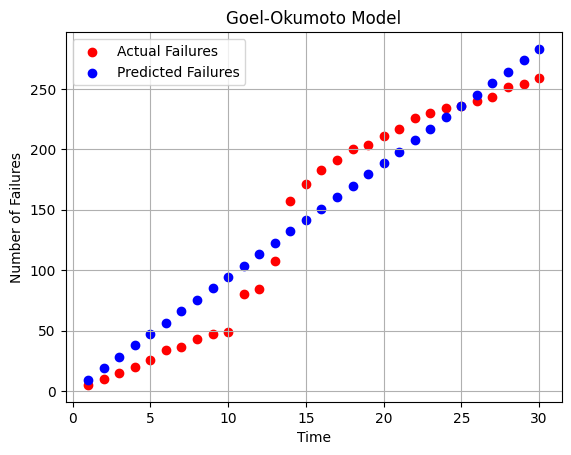

In [45]:
def yr_model(params, time):
    a, b = params
    return a * (1 - np.exp(-b * time))

# Load the dataset
time = np.arange(1, 31)
failures = np.array([ 5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171,183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])

# Initial parameter guess
initial_params = [1490783.2315466048, 6.332106498026109e-06]

# Estimate the parameters using optimization
result = least_squares(nls, initial_params, args=(time, failures))

# Get the estimated parameters
estimated_params = result.x
print("Estimated Parameters (a, r, c, d):", estimated_params)

# Generate predicted failures based on the estimated parameters
predicted_time = np.linspace(1, 30, 30)  # Time points for prediction
predicted_failures = yr_model(estimated_params, predicted_time)

# Plot the actual failures and predicted failures
plt.scatter(time, failures, c='red', label='Actual Failures')
plt.scatter(predicted_time, predicted_failures, c='blue', label='Predicted Failures')

plt.xlabel('Time')
plt.ylabel('Number of Failures')
plt.title('Goel-Okumoto Model')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Goel-Okumoto model function
def goel_okumoto(time, a, b, alpha):
    return a * (1 - np.exp(-b * time)) * (1 - alpha) + alpha * a * (time ** b)

# Fit the model to the data and estimate the best parameters
initial_guess = (1, 1,1)  # Initial guess for D and alpha
param_bounds = ([0, 0,0], [np.inf, np.inf, np.inf])

best_params, _ = curve_fit(goel_okumoto, time, failures, p0=initial_guess, bounds=param_bounds, maxfev=10000)

# Extract the estimated parameters
a_est, D_estimate, alpha_estimate = best_params

print("Estimated Parameters:")
print(a_est)
print("Initial Fault Count (D):", D_estimate)
print("Shape Parameter (alpha):", alpha_estimate)

Estimated Parameters:
0.0005191705719657158
Initial Fault Count (D): 0.9912414888127424
Shape Parameter (alpha): 19685.263885462995


Estimated Parameters (a, r, c, d): [5.17146728e-04 9.91241474e-01 1.97621594e+04]


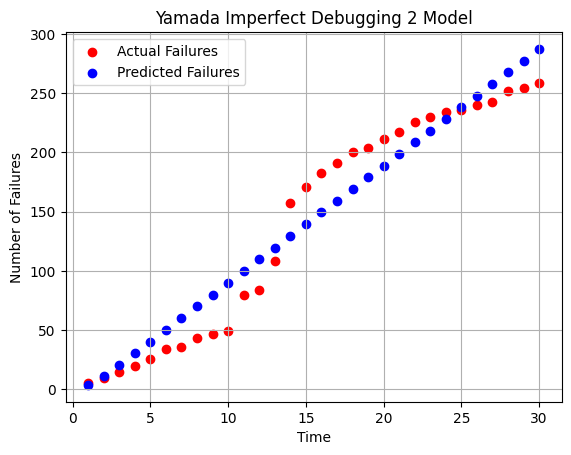

In [9]:
def yr_model(params, time):
    a, b, alpha = params
    return a * (1 - np.exp(-b * time)) * (1 - alpha) + alpha * a * (time ** b)
# Load the dataset
time = np.arange(1, 31)
failures = np.array([ 5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171,183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])

# Initial parameter guess
initial_params = [0.0005191705719657158, 0.9912414888127424,19685.263885462995]

# Estimate the parameters using optimization
result = least_squares(nls, initial_params, args=(time, failures))

# Get the estimated parameters
estimated_params = result.x
print("Estimated Parameters (a, r, c, d):", estimated_params)

# Generate predicted failures based on the estimated parameters
predicted_time = np.linspace(1, 30, 30)  # Time points for prediction
predicted_failures = yr_model(estimated_params, predicted_time)

# Plot the actual failures and predicted failures
plt.scatter(time, failures, c='red', label='Actual Failures')
plt.scatter(predicted_time, predicted_failures, c='blue', label='Predicted Failures')

plt.xlabel('Time')
plt.ylabel('Number of Failures')
plt.title('Yamada Imperfect Debugging 2 Model')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Goel-Okumoto model function
def goel_okumoto(time,a, r, c, d):
    return a * (1 - np.exp(-r * c * (1 - np.exp(-d * time**2 / 2))))

# Fit the model to the data and estimate the best parameters
initial_guess = (1, 1,1,1)  # Initial guess for D and alpha
param_bounds = ([0, 0,0,0], [np.inf, np.inf, np.inf,np.inf])

best_params, _ = curve_fit(goel_okumoto, time, failures, p0=initial_guess, bounds=param_bounds, maxfev=10000)

# Extract the estimated parameters
a_est, r_estimate, c_estimate, d_est = best_params

print("Estimated Parameters:")
print(a_est)
print(r_estimate)
print("Initial Fault Count (D):", c_estimate)
print("Shape Parameter (alpha):", d_est)

Estimated Parameters:
270.0935444153771
34.81105389153369
Initial Fault Count (D): 34.81104639817462
Shape Parameter (alpha): 5.958271413740416e-06


<ipython-input-17-795c54fa9f31>:7: RuntimeWarning: overflow encountered in exp
  return a * (1 - np.exp(-r * c * (1 - np.exp(-d * time**2 / 2))))


Estimated Parameters (a, b): [2.70092369e+02 3.51230676e+01 3.51230596e+01 5.85288548e-06]


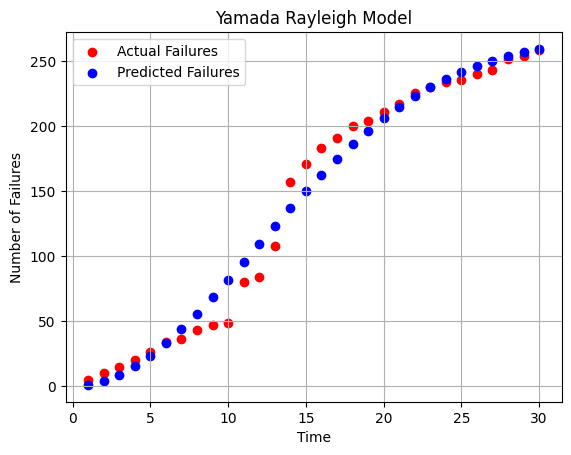

In [17]:
import numpy as np
from scipy.optimize import minimize

# Define the Jelinski-Moranda (JM) model function
def yr_model(params, time):
    a, r, c, d = params
    return a * (1 - np.exp(-r * c * (1 - np.exp(-d * time**2 / 2))))


# Load the dataset
time = np.arange(1, 31)
failures = np.array([ 5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171,183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])

# Initial parameter guess
initial_params = [1, 1,1,1]
initial_params = [270.0935444153771, 34.81105389153369,34.81104639817462,5.958271413740416e-06]

# Estimate the parameters using optimization
result = least_squares(nls, initial_params, args=(time, failures))

# Get the estimated parameters
estimated_params = result.x
print("Estimated Parameters (a, b):", estimated_params)

# Fit the JM model to the dataset using the estimated parameters
predicted_failures = yr_model(estimated_params, time)



# Generate predicted failures based on the estimated parameters
predicted_time = np.linspace(1, 30, 30)  # Time points for prediction
predicted_failures = yr_model(estimated_params, predicted_time)

# Plot the actual failures and predicted failures as scatter plots
plt.scatter(time, failures, c='red', label='Actual Failures')
plt.scatter(predicted_time, predicted_failures, c='blue', label='Predicted Failures')

plt.xlabel('Time')
plt.ylabel('Number of Failures')
plt.title('Yamada Rayleigh Model')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Goel-Okumoto model function
def goel_okumoto(time,a,b, alpha, beta):
    return (a * (1 - np.exp(-b * time)) * (1 - alpha) + alpha * a * (time ** b)) / (1 + beta * np.exp(-b * time))

# Fit the model to the data and estimate the best parameters
initial_guess = (1, 1,1,1)  # Initial guess for D and alpha
param_bounds = ([0, 0,0,0], [np.inf, np.inf, np.inf,np.inf])

best_params, _ = curve_fit(goel_okumoto, time, failures, p0=initial_guess, bounds=param_bounds, maxfev=10000)

# Extract the estimated parameters
a_est, r_estimate, c_estimate, d_est = best_params

print("Estimated Parameters:")
print(a_est)
print(r_estimate)
print("Initial Fault Count (D):", c_estimate)
print("Shape Parameter (alpha):", d_est)

Estimated Parameters:
130.8782058000379
0.32831616969049615
Initial Fault Count (D): 0.458124178715452
Shape Parameter (alpha): 52.03949309057805


Estimated Parameters (a, r, c, d): [130.89559422   0.32830769   0.45801569  52.03786656]


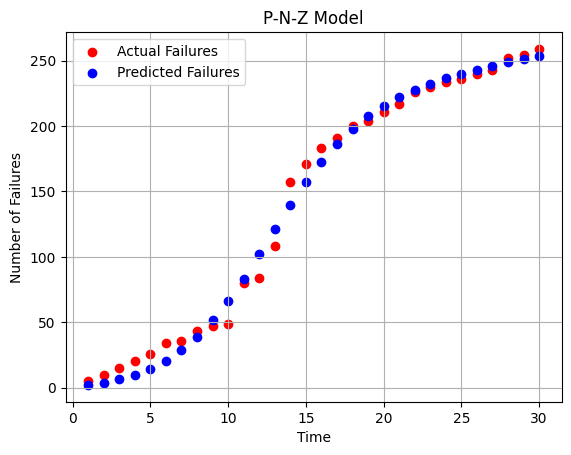

In [20]:
def yr_model(params, time):
    a, b, alpha,beta = params
    return (a * (1 - np.exp(-b * time)) * (1 - alpha) + alpha * a * (time ** b)) / (1 + beta * np.exp(-b * time))
# Load the dataset
time = np.arange(1, 31)
failures = np.array([ 5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171,183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])

# Initial parameter guess
initial_params = [1, 1,1,1]
initial_params = [130.8782058000379, 0.32831616969049615,0.458124178715452,52.03949309057805]

# Estimate the parameters using optimization
result = minimize(objective, initial_params, args=(time, failures))

# Get the estimated parameters
estimated_params = result.x
print("Estimated Parameters (a, r, c, d):", estimated_params)

# Generate predicted failures based on the estimated parameters
predicted_time = np.linspace(1, 30, 30)  # Time points for prediction
predicted_failures = yr_model(estimated_params, predicted_time)

# Plot the actual failures and predicted failures
plt.scatter(time, failures, c='red', label='Actual Failures')
plt.scatter(predicted_time, predicted_failures, c='blue', label='Predicted Failures')

plt.xlabel('Time')
plt.ylabel('Number of Failures')
plt.title('P-N-Z Model')
plt.legend()
plt.grid(True)
plt.show()